In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("trainfx.csv")
data.head()

,Unnamed: 0,Unnamed: 0.1,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle type,rescue center,time key sélection,status preceding selection,departed from its rescue center,longitude before departure,latitude before departure,OSRM estimated distance,OSRM estimated duration,month
0,0,0,3,2162,0,0,148.0,2.284796,48.879669,69,2447,19,0,1,2.288053,48.884698,952.5,105.8,7
1,1,1,3,2124,0,1,136.0,2.247464,48.818191,27,2464,9,0,1,2.268519,48.823958,2238.5,243.2,1
2,2,2,3,2163,0,2,139.0,2.258328,48.836759,69,2438,10,1,0,2.272944,48.850498,3026.4,295.4,11
3,3,3,3,2162,0,0,136.0,2.393832,48.776526,69,2510,0,0,1,2.388940,48.787732,1934.2,166.6,1
4,4,4,3,2162,0,3,104.0,2.458610,48.875751,69,2478,0,0,1,2.439331,48.863814,2706.7,262.6,11


In [3]:
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [4]:
data.head()

,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle type,rescue center,time key sélection,status preceding selection,departed from its rescue center,longitude before departure,latitude before departure,OSRM estimated distance,OSRM estimated duration,month
0,3,2162,0,0,148.0,2.284796,48.879669,69,2447,19,0,1,2.288053,48.884698,952.5,105.8,7
1,3,2124,0,1,136.0,2.247464,48.818191,27,2464,9,0,1,2.268519,48.823958,2238.5,243.2,1
2,3,2163,0,2,139.0,2.258328,48.836759,69,2438,10,1,0,2.272944,48.850498,3026.4,295.4,11
3,3,2162,0,0,136.0,2.393832,48.776526,69,2510,0,0,1,2.388940,48.787732,1934.2,166.6,1
4,3,2162,0,3,104.0,2.458610,48.875751,69,2478,0,0,1,2.439331,48.863814,2706.7,262.6,11


In [5]:
data.describe()

,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle type,rescue center,time key sélection,status preceding selection,departed from its rescue center,longitude before departure,latitude before departure,OSRM estimated distance,OSRM estimated duration,month
count,219337.000000,219337.000000,219337.000000,219337.000000,219337.000000,219337.000000,219337.000000,219337.000000,219337.000000,219337.000000,219337.000000,219337.000000,219337.000000,219337.000000,219337.000000,219337.000000,219337.000000
mean,3.088243,2228.383196,0.146514,1.201772,144.645760,2.366876,48.859919,57.395428,4902.916580,13.089707,0.022354,0.977646,2.366780,48.859771,2238.134131,243.543657,6.322668
std,1.400011,1630.641656,0.353622,2.500414,53.431995,0.086107,0.049105,20.358112,25219.717173,6.466197,0.147831,0.147831,0.084711,0.048519,1591.647524,133.756794,3.542694
min,1.000000,1911.000000,0.000000,-10.000000,0.000000,2.146608,48.689016,0.000000,2418.000000,0.000000,0.000000,0.000000,2.093597,48.711723,0.800000,0.100000,1.000000
25%,3.000000,2112.000000,0.000000,0.000000,136.000000,2.306414,48.829362,58.000000,2449.000000,9.000000,0.000000,1.000000,2.305704,48.831225,1221.100000,153.900000,3.000000
50%,3.000000,2135.000000,0.000000,0.000000,139.000000,2.359659,48.863684,69.000000,2472.000000,14.000000,0.000000,1.000000,2.361823,48.864165,1866.800000,219.100000,6.000000
75%,3.000000,2162.000000,0.000000,2.000000,148.000000,2.415287,48.892817,69.000000,2488.000000,19.000000,0.000000,1.000000,2.406789,48.891143,2834.600000,305.700000,10.000000
max,9.000000,93529.000000,1.000000,100.000000,325.000000,2.601520,49.010871,74.000000,266326.000000,23.000000,1.000000,1.000000,2.574861,49.015576,42752.800000,2751.700000,12.000000


In [6]:
label = pd.read_csv('y_train.csv', index_col=0)
label.head()

,delta selection-departure,delta departure-presentation,delta selection-presentation
emergency vehicle selection,,,
5105452,86,324,410
4720915,164,297,461
5365374,125,365,490
4741586,168,160,328
5381209,138,523,661


Lasso:  41.03573520821517 0.03512927956018497
Linear:  41.034830766218974 0.03512245082615484
Bayesian:  41.0367458651394 0.03500201099082911
ElasticNet:  41.12132834740323 0.0345531950529
Random Forest:  37.65516327965926 -0.009618862505592851
XGBR:  37.82058185442781 0.06462901089833661


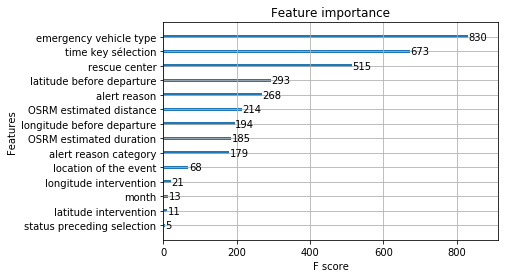

<Figure size 288x288 with 0 Axes>

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data, label['delta selection-departure'], test_size=0.25, random_state=42)

from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)
print("Lasso: ", mean_absolute_error(y_pred, y_test), r2_score(y_test, y_pred))

linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
print("Linear: ", mean_absolute_error(y_pred, y_test), r2_score(y_test, y_pred))

reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Bayesian: ", mean_absolute_error(y_pred, y_test), r2_score(y_test, y_pred))

reg = linear_model.ElasticNet()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("ElasticNet: ", mean_absolute_error(y_pred, y_test), r2_score(y_test, y_pred))

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(random_state=0, n_estimators=100)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
print("Random Forest: ",mean_absolute_error(y_pred, y_test), r2_score(y_test, y_pred))

import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
xg_reg = xgb.XGBRegressor(learning_rate = 0.01, n_estimators = 500)
xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)
print("XGBR: ", mean_absolute_error(y_pred, y_test), r2_score(y_test, y_pred))

import matplotlib.pyplot as plt

xgb.plot_importance(xg_reg)
plt.figure(figsize=(4,4))
plt.show()

Lasso:  106.94824361364515 0.22523496859145786
Linear:  106.9678842512962 0.22521463167364797
Bayesian:  106.95089148023074 0.2252607642402643
ElasticNet:  107.37271070783366 0.22244103037474938
Random Forest:  103.94839720744287 0.23718868151061734
XGBR:  104.19350425599865 0.2388199967984478


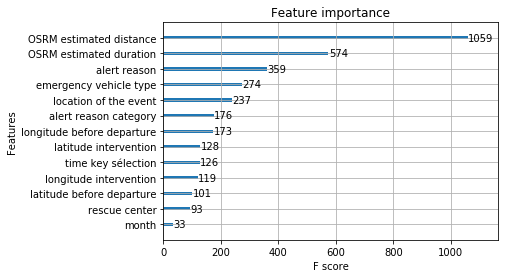

<Figure size 288x288 with 0 Axes>

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data, label['delta departure-presentation'], test_size=0.25, random_state=42)

from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)
print("Lasso: ", mean_absolute_error(y_pred, y_test), r2_score(y_test, y_pred))

linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
print("Linear: ", mean_absolute_error(y_pred, y_test), r2_score(y_test, y_pred))

reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Bayesian: ", mean_absolute_error(y_pred, y_test), r2_score(y_test, y_pred))

reg = linear_model.ElasticNet()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("ElasticNet: ", mean_absolute_error(y_pred, y_test), r2_score(y_test, y_pred))

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(random_state=0, n_estimators=100)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
print("Random Forest: ",mean_absolute_error(y_pred, y_test), r2_score(y_test, y_pred))

import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
xg_reg = xgb.XGBRegressor(learning_rate = 0.01, n_estimators = 500)
xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)
print("XGBR: ", mean_absolute_error(y_pred, y_test), r2_score(y_test, y_pred))

import matplotlib.pyplot as plt

xgb.plot_importance(xg_reg)
plt.figure(figsize=(4,4))
plt.show()